# Examples of estimation in Markov's chains
## Hidden Markov Model, HMM

### Woman, her activity and weather

In this [problem]('https://en.wikipedia.org/wiki/Hidden_Markov_model') we know only the result of woman's activity and have to estimate weather

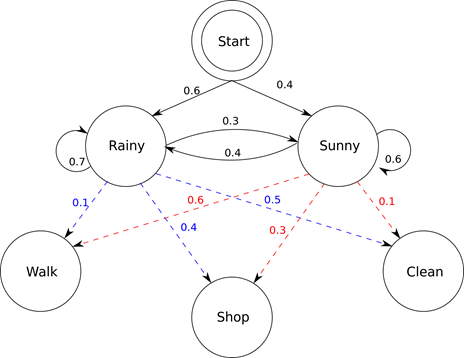

Optimal $\hat X (t) = E[X(t) | Y_t]$ (not linear) estimation for probability of Rainy/Sunny days can be computed by next formula

Start:

$\hat X (0) = norm(diag(Q(0) Y(0)) \pi(0))$

Step:

$ \tilde X (t) = P^{T} (t) \hat X (t-1)$

Correction:

$\hat X (t) = norm(diag(Q(t) Y(t)) \tilde X (t))$

Where:

$diag$ - function which make from vector square matrix with vector's elements on diagonal

$norm$ - function which make normalization of len of vector

$P(t)$ - probability transition matrix for weather

$Q(t)$ - probabily transition matrix for action by weather


Also, we will compare this results with optimal linear estimation (Kalman filter)



In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import math
from tqdm.notebook import tqdm
import seaborn as sns

%load_ext autoreload
%autoreload 1
%aimport classes.MarkovChains

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [106]:
days = 365
Dasha_U = classes.MarkovChains.Woman(days=days)
true_weather = Dasha_U.simulate_weather()
Dasha_U.simulate_action()
est_weather = Dasha_U.optimal_estimation()
est_linear = Dasha_U.linear_estimation() # Kalman filter

  0%|          | 0/365 [00:00<?, ?it/s]

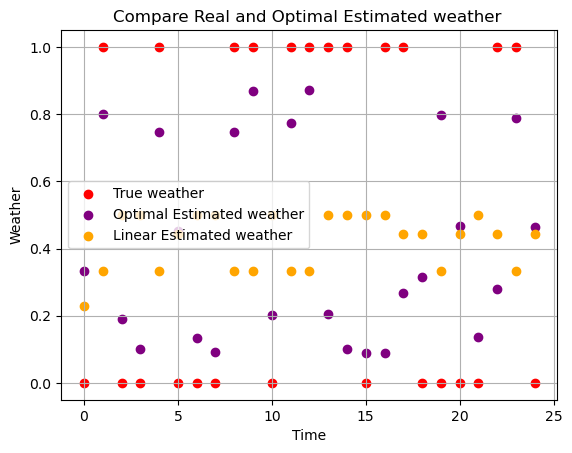

<Figure size 1200x600 with 0 Axes>

In [108]:
year = np.arange(days)
N = 25
plt.scatter(year[:N], true_weather[:N], linestyle='-', c='red', label='True weather')
plt.scatter(year[:N], np.array(est_weather)[:,1][:N], linestyle='-', c='purple', label='Optimal Estimated weather')
plt.scatter(year[:N], np.array(est_linear)[:,1][:N], linestyle='-', c='orange', label='Linear Estimated weather')
plt.grid()
plt.xlabel('Time')
plt.ylabel('Weather')
plt.title("Compare Real and Optimal Estimated weather ")
plt.legend()
plt.figure(figsize=(12, 6))
plt.show()

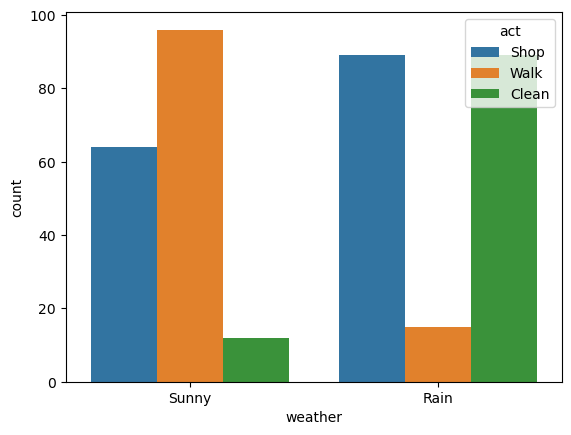

In [12]:
Dasha_U.plot_statistic()

## Results

Optimal estimation give better results then usual Kalman filter in this problem